In [349]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [350]:
def sample_1d_gaussian(size, mu, sigma):
    return np.random.randn(size)*sigma + mu

def normality_test(samples):
    sw_stats = []
    ks_stats = []

    for _, X in sorted(samples.iteritems()):
        sw_stats.append(sp.stats.shapiro(X))
        ks_stats.append(sm.stats.lillifors(X))

    return np.array(sw_stats)[:,1], np.array(ks_stats)[:,1]

def generate_normal_samples(n_list):
    X = {}
    for n in n_list:
        X[n] = sample_1d_gaussian(n, 0, 1)
    return X

def generate_mixture_samples(n_list, mu, sigma):
    params = zip(mu, sigma)
    
    M = {}
    for n in n_list:
        M_pool = np.array(map(lambda param: sample_1d_gaussian(n, param[0], param[1]), params)).T
        modal_ix = np.random.choice([0,1,2], size=n, p=(0.2, 0.3, 0.5), replace=True)
        M[n] = M_pool[range(n), modal_ix]
        
    return M

# Normality Test for Samples from Normal Distribution

In [351]:
n_trials = 10
n_list = np.power(2, np.concatenate([[4, 6, 8], np.arange(10,21)]))

sw_pval_all = []
ks_pval_all = []
for t in range(n_trials):
    X = generate_normal_samples(n_list)
    sw_pval_t, ks_pval_t = normality_test(X)
    
    sw_pval_all.append(sw_pval_t)
    ks_pval_all.append(ks_pval_t)
    
sw_pval_mean = np.mean(sw_pval_all, axis=0)
sw_pval_std = np.std(sw_pval_all, axis=0)

ks_pval_mean = np.mean(ks_pval_all, axis=0)
ks_pval_std = np.std(ks_pval_all, axis=0)

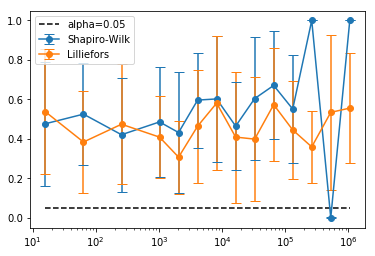

In [352]:
plt.errorbar(n_list, sw_pval_mean, yerr=sw_pval_std, fmt='-o', capsize=5, label='Shapiro-Wilk')
plt.errorbar(n_list, ks_pval_mean, yerr=ks_pval_std, fmt='-o', capsize=5, label='Lilliefors')
plt.semilogx([2**4, 2**20], [0.05]*2, 'k--', label='alpha=0.05')
plt.axes().set_xscale('log')

plt.legend()

None

# Normality Test for Samples from Mixture of Normal Distributions

In [353]:
# tri-modal distributions will be tested

n_trials = 100
n_list = np.power(2, np.concatenate([[4, 6, 8], np.arange(10,21)]))
modes = [-3, 0, 5]
stds = [1, 1, 1]

sw_pval_all = []
ks_pval_all = []
for _ in range(n_trials):
    M = generate_mixture_samples(n_list, modes, stds)    
    sw_pval_t, ks_pval_t = normality_test(M)
    
    sw_pval_all.append(sw_pval_t)
    ks_pval_all.append(ks_pval_t)
    
sw_pval_mean = np.mean(sw_pval_all, axis=0)
sw_pval_std = np.std(sw_pval_all, axis=0)

ks_pval_mean = np.mean(ks_pval_all, axis=0)
ks_pval_std = np.std(ks_pval_all, axis=0)

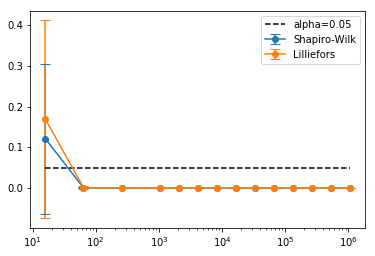

In [354]:
plt.errorbar(n_list, sw_pval_mean, yerr=sw_pval_std, fmt='-o', capsize=5, label='Shapiro-Wilk')
plt.errorbar(n_list, ks_pval_mean, yerr=ks_pval_std, fmt='-o', capsize=5, label='Lilliefors')
plt.semilogx([2**4, 2**20], [0.05]*2, 'k--', label='alpha=0.05')
plt.axes().set_xscale('log')

plt.legend()

None